<a href="https://colab.research.google.com/github/Akshaykumarmundrathi/HousePricePrediction/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
input_list = pd.read_csv('realest.csv')
def analyzeAndFitLRM(input_list):
    # Assume input_list[0] is the DataFrame, input_list[1] is the summary dictionary
    df = input_list

    # Select relevant columns and drop rows with missing values (listwise deletion)
    columns = ['Price','Bedroom','Space','Room','Lot','Tax','Bathroom','Garage','Condition']
    df_clean = df[columns].replace('NA', np.nan).dropna().astype(float)
    n_obs = len(df_clean)

    # Prepare X and y
    X = df_clean[['Bedroom','Space','Room','Lot','Tax','Bathroom','Garage','Condition']]
    y = df_clean['Price']

    # Fit linear regression model
    reg = LinearRegression()
    reg.fit(X, y)

    # Prepare model parameters dictionary
    params = {'Intercept': reg.intercept_}
    for idx, col in enumerate(X.columns):
        params[col] = reg.coef_[idx]

    # Predict price for the given house
    house = np.array([[3, 1500, 8, 40, 40000, 2, 1, 0]])
    price_pred = reg.predict(house)[0]

    # Prepare summary dictionary
    summary = {
        'n_observations': n_obs,
        'mean_price': y.mean(),
        'std_price': y.std()
    }

    # Prepare regression dictionary
    regression = {
        'model_parameters': params,
        'price_prediction': price_pred
    }

    return [summary, regression]


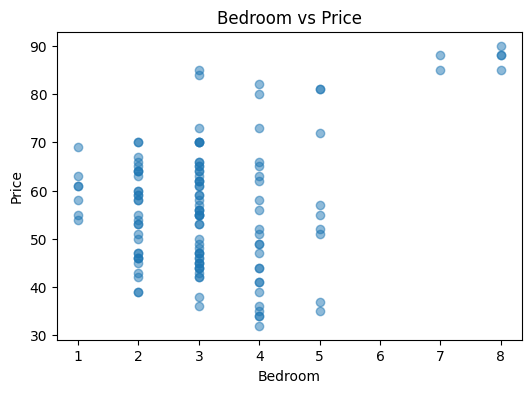

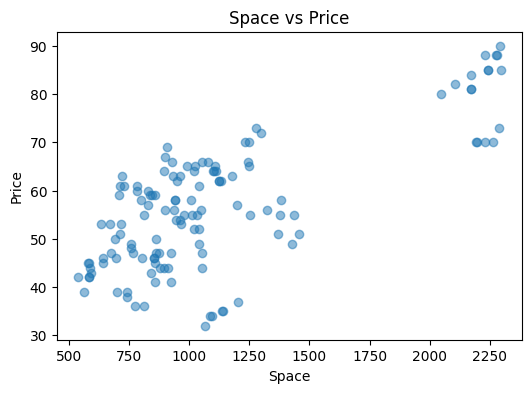

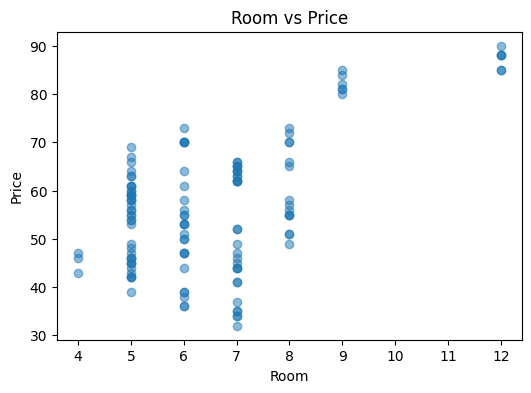

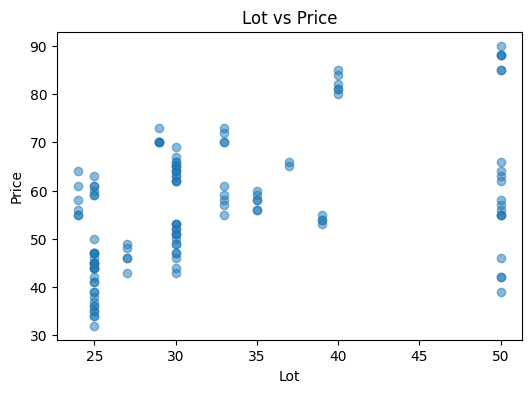

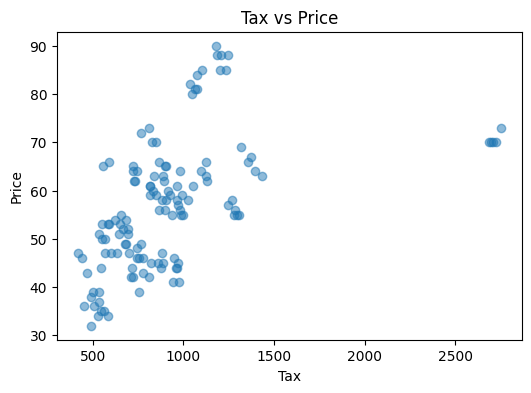

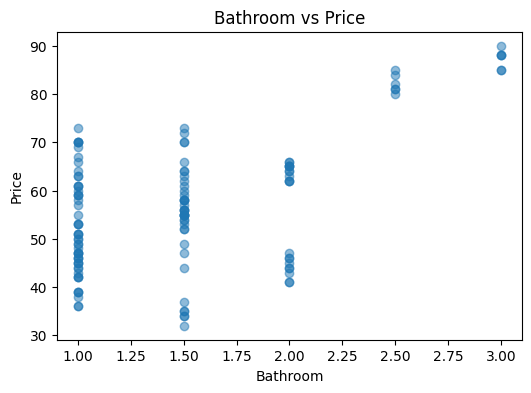

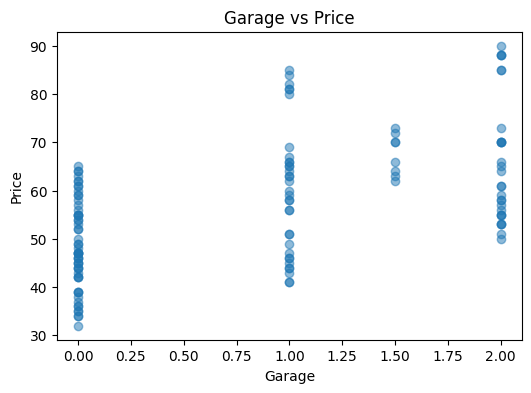

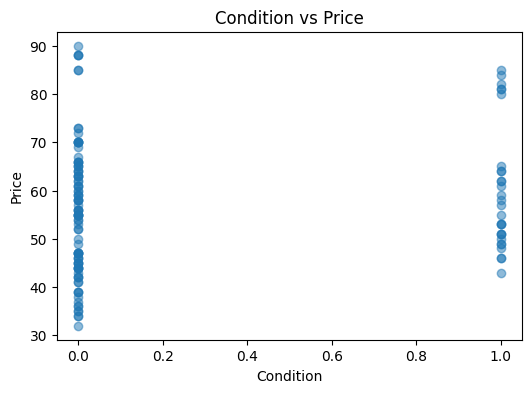

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


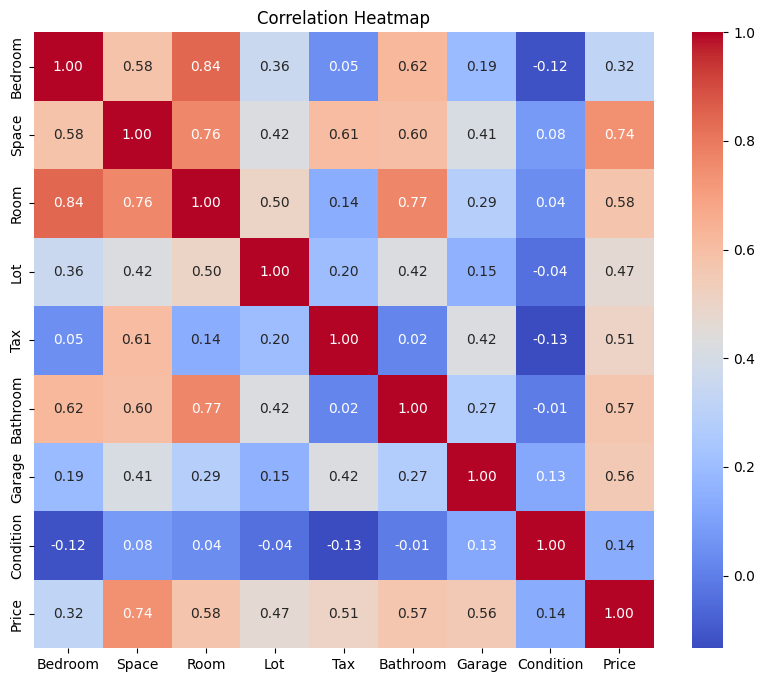

[{'n_observations': 128,
  'mean_price': np.float64(56.71875),
  'std_price': 13.348707507694678},
 {'model_parameters': {'Intercept': np.float64(19.99346772806809),
   'Bedroom': np.float64(-3.1602387359607063),
   'Space': np.float64(0.009663227796334398),
   'Room': np.float64(1.688951107319769),
   'Lot': np.float64(0.23621323117136808),
   'Tax': np.float64(0.004412718519150624),
   'Bathroom': np.float64(6.375785992212338),
   'Garage': np.float64(4.144757426848795),
   'Condition': np.float64(1.835795374320289)},
  'price_prediction': np.float64(241.37280149739888)}]

In [8]:
analyzeAndFitLRM(input_list)

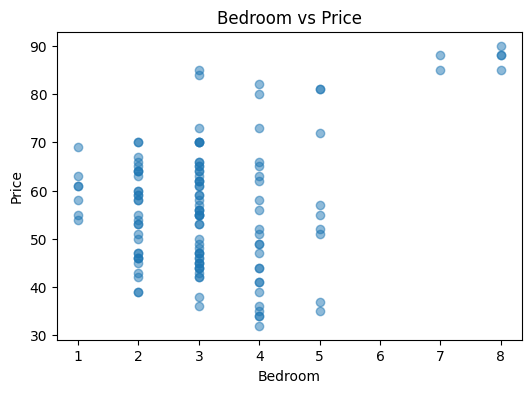

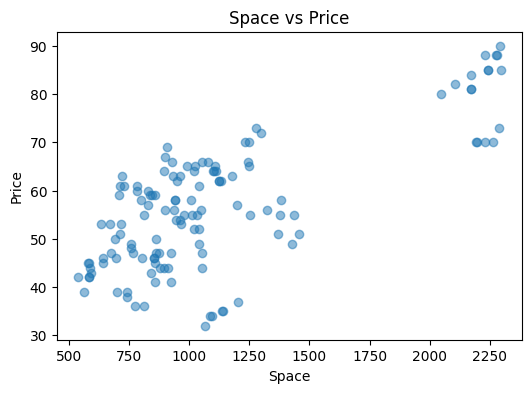

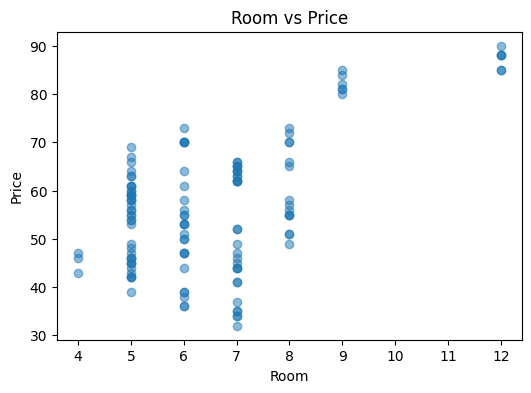

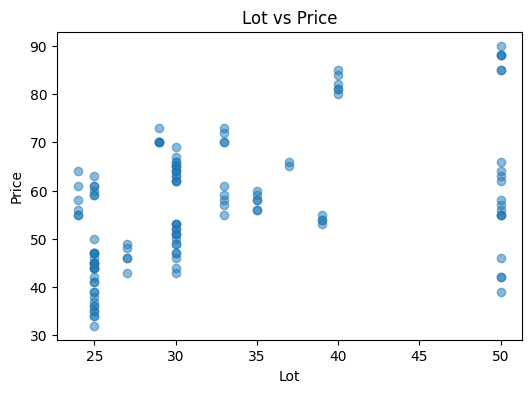

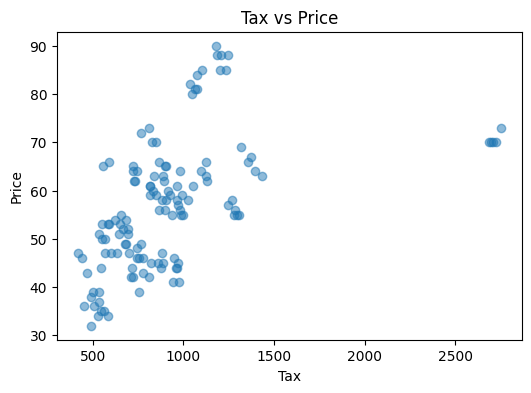

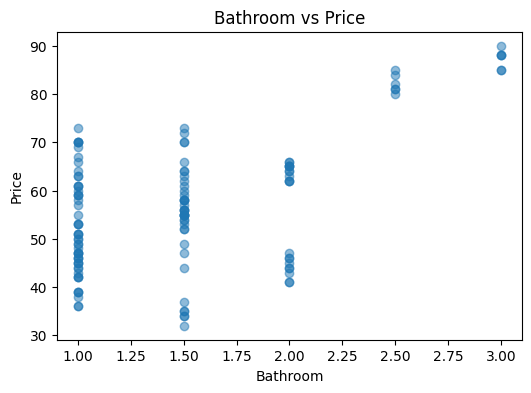

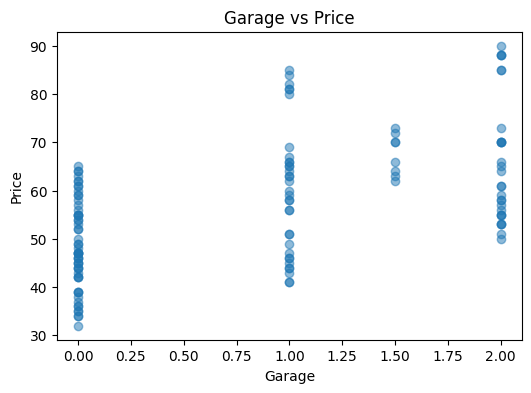

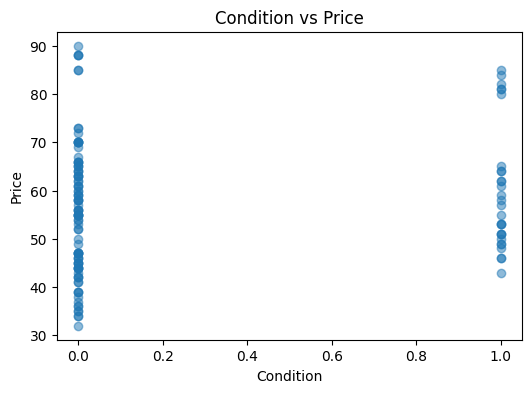

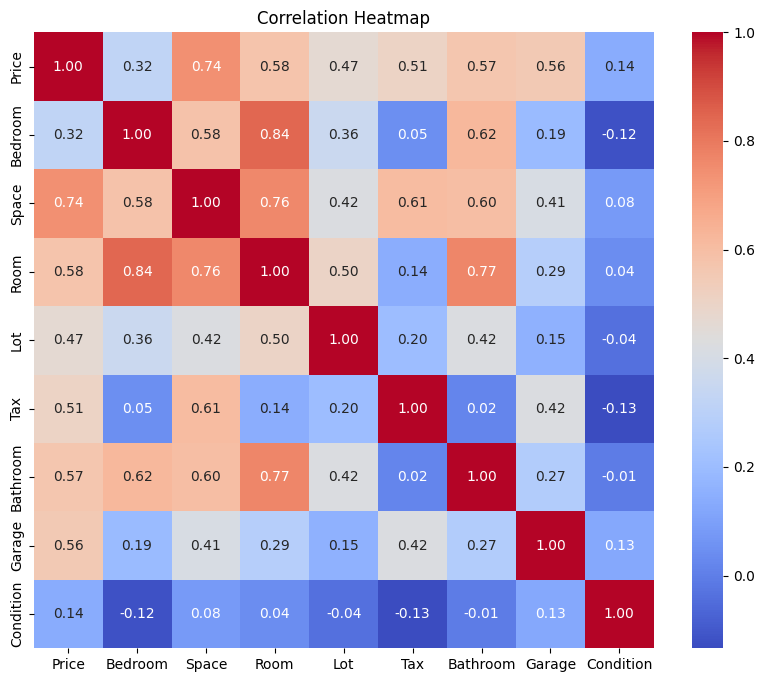

Model Performance:
R-squared: 0.70
Mean Absolute Error (MAE): $6.37
Root Mean Squared Error (RMSE): $7.59



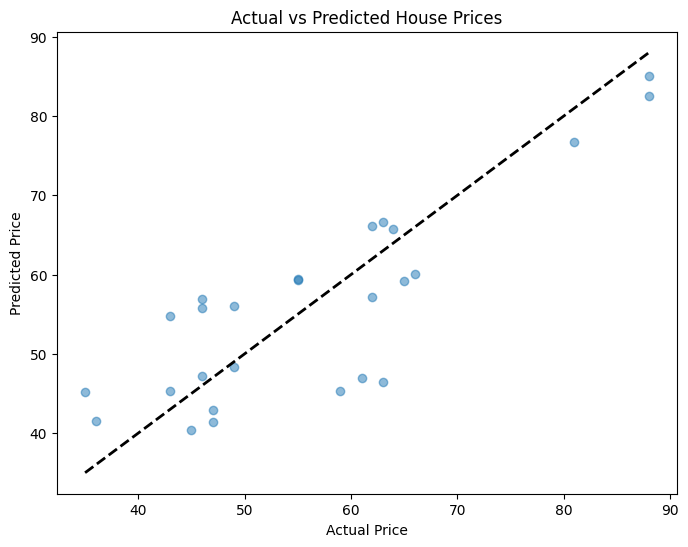

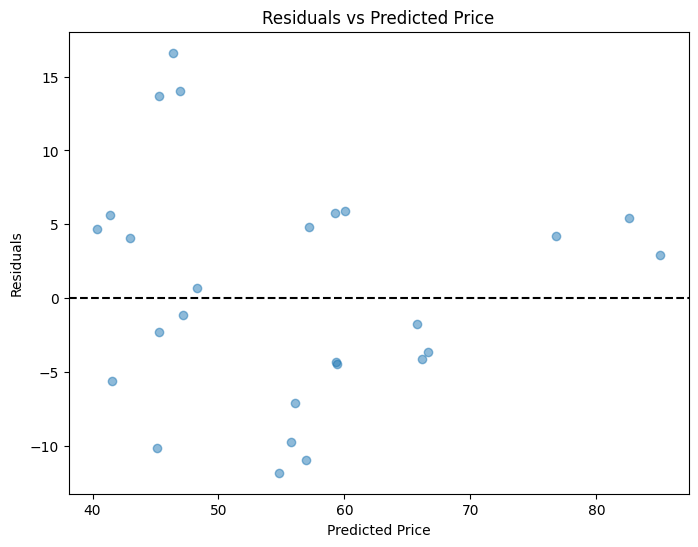


Predicted Price for the Example House:
$199.58

Model Parameters:
Intercept: 21.77
Bedroom: -2.29
Space: 0.01
Room: 0.52
Lot: 0.28
Tax: 0.00
Bathroom: 7.29
Garage: 5.12
Condition: 1.90


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load and Prepare Data
# Assume your data is loaded as df. If you have a CSV, use:
df = pd.read_csv('realest.csv')

# Listwise deletion for missing values
cols = ['Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']
df_clean = df[cols].dropna().copy()

# 2. Visualizations

# 2.1 Scatter Plots for each predictor vs Price
for col in ['Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']:
    plt.figure(figsize=(6, 4))
    plt.scatter(df_clean[col], df_clean['Price'], alpha=0.5)
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

# 2.2 Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 3. Model Building and Evaluation

# 3.1 Split data
X = df_clean[['Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']]
y = df_clean['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3.2 Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# 3.3 Predict and calculate errors
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print('Model Performance:')
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error (MAE): ${mae:,.2f}')
print(f'Root Mean Squared Error (RMSE): ${rmse:,.2f}\n')

# 3.4 Visualize Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()

# 3.5 Visualize Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price')
plt.show()

# 4. Prediction for Specific House

# Example house: Bedroom=3, Space=1500, Room=8, Lot=40, Tax=40000, Bathroom=2, Garage=1, Condition=0 (bad)
house_data = [[3, 1500, 8, 40, 40000, 2, 1, 0]]
predicted_price = model.predict(house_data)[0]

print('\nPredicted Price for the Example House:')
print(f'${predicted_price:,.2f}')

# 5. Model Parameters (Optional: Print coefficients and intercept)
params = {'Intercept': model.intercept_}
for i, col in enumerate(X.columns):
    params[col] = model.coef_[i]

print('\nModel Parameters:')
for key, value in params.items():
    print(f'{key}: {value:.2f}')
